# Gaussian Process Classificator

## Import and Settings

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from joblib import dump, load
import dask.dataframe as dd
import numpy as np

In [3]:
df = dd.read_csv('prepared_ds.csv')

In [4]:
# load model to skip next parts
clf = load('models/gpc.joblib')

## df_fast initialisieren (size = 0.01)

In [5]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()

In [6]:
df_fast.shape

(7605, 41)

## train, test split

In [7]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[1:-1]], df_fast['Label'], test_size=0.2, random_state=1)

## Training

### Model 1

The accuracy increases if we choose the hidden layers to be half of the size of the previous one significantly.

In [8]:
clf = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), optimizer=None, random_state=1, multi_class='one_vs_one', n_jobs=-1, copy_X_train=False)
clf.fit(train, train_lbl)

GaussianProcessClassifier(copy_X_train=False, kernel=1**2 * RBF(length_scale=1),
                          multi_class='one_vs_one', n_jobs=-1, optimizer=None,
                          random_state=1)

#### Accuracy

In [9]:
df_fast.loc[56145]

,Unnamed: 0,Protocol_0,Protocol_6,Protocol_17,dst_port_transformed_Dynamic,dst_port_transformed_System,dst_port_transformed_User,src_port_transformed_Dynamic,src_port_transformed_System,src_port_transformed_User,...,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,Label
56145,304650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.264857,0.037268,0.01309,-0.929019,-0.076213,-0.163087,0.252890,0.156876,-0.138464,ddos
56145,4748740,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.269775,0.019496,-0.02703,-0.287307,0.640327,-0.018994,-0.191823,0.009968,0.197419,Benign


In [10]:
test.iloc[0]

Protocol_0                      0.000000
Protocol_6                      1.000000
Protocol_17                     0.000000
dst_port_transformed_Dynamic    0.000000
dst_port_transformed_System     1.000000
dst_port_transformed_User       0.000000
src_port_transformed_Dynamic    1.000000
src_port_transformed_System     0.000000
src_port_transformed_User       0.000000
SYN Flag Cnt                    0.000000
RST Flag Cnt                    0.000000
PSH Flag Cnt                    0.000000
ACK Flag Cnt                    1.000000
CWE Flag Count                  0.000000
ECE Flag Cnt                    0.000000
PC-0                           -2.190629
PC-1                           -1.225286
PC-2                            0.079405
PC-3                            0.040092
PC-4                           -0.053032
PC-5                           -0.545471
PC-6                           -1.306496
PC-7                            0.521450
PC-8                           -0.874271
PC-9            

In [11]:
clf.predict(test)

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'ddos'],
      dtype='<U6')

In [12]:
clf.score(test, test_lbl)

0.9894806048652203

## confusion matrix (fp (wenn 1 (positiv) = DDoS) minimieren)

In [13]:
confusion_mtx = confusion_matrix(test_lbl, clf.predict(test))

In [14]:
np.round(confusion_mtx/len(test_lbl), 3)

array([[0.824, 0.007],
       [0.003, 0.166]])

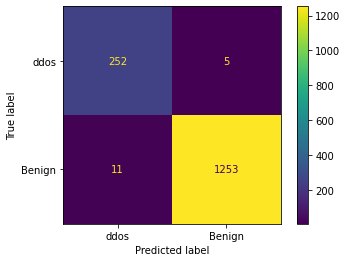

In [15]:
plot_confusion_matrix(clf, test, test_lbl, labels=['ddos', 'Benign'])

In [16]:
# false positive
confusion_mtx[0, 1]

11

The model might be good at predicting the correct values but it takes much space and time to train it.

## Modell speichern

In [17]:
dump(clf, 'models/gpc.joblib')

['models/gpc.joblib']